In [7]:
import numpy as np
import matplotlib.pyplot as plt

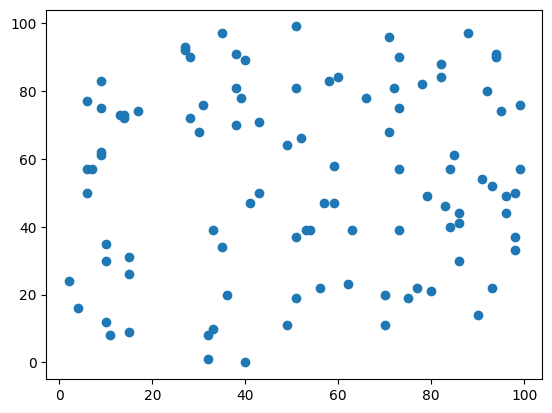

In [8]:
x = []
y = []
for num in range(100):
    x.append(np.random.randint(0, 100))
    
for num in range(100):
    y.append(np.random.randint(0, 100))

plt.figure("scatterplot")
plt.scatter(x, y)

In [9]:
def temp_rateofchange(h, A, m_c, c_c, T_out, T_c):  # Returns rate of change of coffee temperature.
    result = (h*A*(T_out - T_c)) / (m_c*c_c)
    print("Rate of change of the coffee temperature is, dT_c/dt = ", result)
    return result

In [10]:
temp_rateofchange(5, 0.04, 0.35, 4200, 25, 40)

Rate of change of the coffee temperature is, dT_c/dt =  -0.0020408163265306124


-0.0020408163265306124

In [11]:
temp_rateofchange(5, 0.04, 0.35, 4200, 5, 40)

Rate of change of the coffee temperature is, dT_c/dt =  -0.004761904761904762


-0.004761904761904762

In [12]:
time_array = []
for num in range(1, 700):
    time_array.append(num * 60)
def coffee_temp_array(h, A, m_c, c_c, T_out, T_c0, time_array):
    temperature_array = []
    for time in time_array:
        temperature = ((T_c0 - T_out) * np.exp(-(h*A*time)/(m_c*c_c))) + T_out
        temperature_array.append(temperature)
    return temperature_array

Text(0.5, 1.0, 'Coffee temperature (*C)')

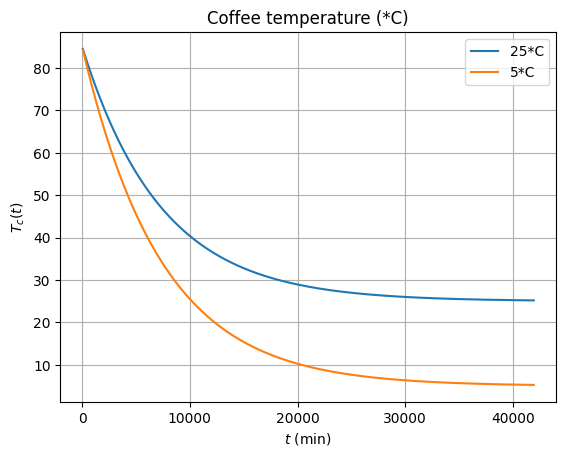

In [13]:
coffee_25 = coffee_temp_array(h = 5, A = 0.04, m_c = 0.35, c_c = 4200, T_out = 25, T_c0 = 85, time_array = time_array)
coffee_5 = coffee_temp_array(h = 5, A = 0.04, m_c = 0.35, c_c = 4200, T_out = 5, T_c0 = 85, time_array = time_array)
plt.figure("coffee")
plt.plot(time_array, coffee_25, label = "25*C")
plt.plot(time_array, coffee_5, label = "5*C")
plt.legend()
plt.grid(True)
plt.ylabel("$T_c(t)$")
plt.xlabel("$t$ (min)")
plt.title("Coffee temperature (*C)")

In [14]:
# Rabbits and foxes

def dr_dt_0(a, b, r_0, f_0):
    result = a*r_0 - b*r_0*f_0
    print("Population growth of rabbits at t_0 =", result)
    return result

def df_dt_0(m, c, b, r_0, f_0):
    result = -m*f_0 + c*b*r_0*f_0
    print("Population growth of foxes at t_0 =", result)
    return result

In [15]:
dr_dt_0(2.0, 0.01, 500, 100)

Population growth of rabbits at t_0 = 500.0


500.0

In [16]:
df_dt_0(1.0, 0.1, 0.01, 500, 100)

Population growth of foxes at t_0 = -50.0


-50.0

In [17]:
dr_dt_0(2.0, 0.01, 500, 350)

Population growth of rabbits at t_0 = -750.0


-750.0

In [18]:
df_dt_0(1.0, 0.1, 0.01, 500, 350)

Population growth of foxes at t_0 = -175.0


-175.0

In [19]:
u = [1, 2, 3]
v = [4, 5, 6]
w = [u[0]+v[0], u[1]+v[1], u[2]+v[2]] # i.e. w = [5,7,9]

print(u + v)
print(w)

[1, 2, 3, 4, 5, 6]
[5, 7, 9]


In [20]:
u = [1, 2, 3]
v = [2*u[0], 2*u[1], 2*u[2]] # i.e. v = [2,4,6]

print(2*u)
print(v)

[1, 2, 3, 1, 2, 3]
[2, 4, 6]


In [21]:
A = [ [1,2,3], [4,5,6] ]
print(A[1][1])

5


In [22]:
#print(A[1,1])
# TypeError: list indices must be integers or slices, not tuple

In [23]:
A[:][0]

[1, 2, 3]

In [24]:
def evalf(u, t):
    """
    args:
        u (float list): current state with u[0] = v and u[1] = w
        t (float): current time

    returns:
        float list for forcing f, where du/dt = f(u, t)
    """
    # unpack state list
    v = u[0]
    w = u[1]

    #### BEGIN SOLUTION ####
    f = []
    f_0 = -100*v + w + t
    f_1 = -v + 2*w - t**3
    f.append(f_0)
    f.append(f_1)
    return f
    #### END SOLUTION ####


In [25]:
evalf([1, 1], 2)
mylist = []
for t in range(100):
    mylist.append(evalf([1, 1], t))
np.array(mylist)
mylist = np.transpose(mylist)

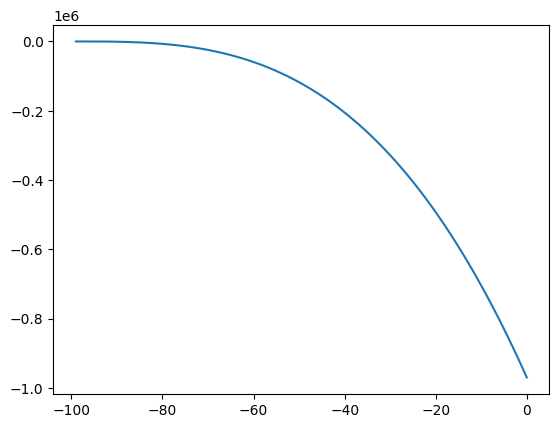

In [26]:
plt.figure("evalf")
plt.plot(mylist[0], mylist[1])

In [27]:
import copy

class IVP(object):
    def __init__(self, uI, tI, tF, p, f):
        """
        Args:
            uI (float list): initial condition of state.
            tI (float): initial time.
            tF (float): final time.
            p (dictionary): set of fixed parameters.
            f (function): takes as input u,t,p and returns du/dt
        """

        self._uI = uI[:]
        self._tI = tI
        self._tF = tF
        self._p  = copy.deepcopy(p)
        self._f  = f
        self._M  = len(uI)

    def evalf(self, u, t):
        """
        Args:
            u (float list): current solution.
            t (float): current time.

        Returns:
            float list: f(u,t,p).
        """

        return self._f(u, t, self._p)

Create an IVP instance for coffee cooling:

$\frac{dT_c}{dt}=\frac{hA}{m_cc_c} (T_out - T_c)  $

$u=T_c$ , $f=\frac{hA}{m_cc_c} (T_{out} - u) $

In [28]:
################################################################################
# IntroToCSE
# IVPlib_rev2
#

"""
This Python library is useful in solving Initial Value Problems (IVP).

It implements an IVP base class which defines an IVP in the form:
    
    du/dt = f(u,t,p)   for u(tI) = uI

In which the problem would be solved from t=tI to tF and p are a set of 
parameters

Notes: This rev of IVPlib includes:
    * virtual evalf (to be defined in a subclass)
    * getters
    * __len__
"""

import copy 

class IVP():
    def __init__(self, uI, tI, tF, p):
        """
        Args:
            uI (float list): initial condition of state.
            tI (float): initial time.
            tF (float): final time.
            p (dictionary): set of fixed parameters.
        """
        
        self._uI = uI[:]
        self._tI = tI
        self._tF = tF
        self._p  = copy.deepcopy(p)

############ (other) dunder methods ############

    def __len__(self):
        """
        len is defined as number of states (in _uI)
        """
        return len(self._uI)
        
############ virtual methods for use outside of class ############
 
    def evalf(self,u,t):  # virtual method, because it must be defined in child class.
                          # IVP is a virtual class because its functionality is NOT
                          # complete without defining an evalf method in subclass.
        """
        Args:
            u (float list): current solution.
            t (float): current time.

        Returns:
            float list: f(u,t).
        """
        raise NotImplementedError("evalf is not implemented for this object")

############ getter methods ############

    def get_tI(self):
        """
        Returns:
            float: initial time.
        """
        return self._tI

    def get_tF(self):
        """
        Returns:
            float: final time.
        """
        return self._tF

    def get_uI(self):
        """
        Returns:
            float list: initial state
        """
        return self._uI[:]

    def get_p(self, name):
        """
        Arg:
            name (key): a key which should be in the object's parameter
            dictionary

        Returns:
            value of parameter key given by name
        """
        return self._p[name]

Now, we go with the subclasses. Changes:
* The __init__ method no longer passes the function reference (since evalf will now be in the subclass).
* The more interesting change is that we still have __evalf__ in this superclass. However, we have implemented\
it to raise an exception if it were to be invoked. What will happen then is if a subclass does not \
implement its own evalf method, then this exception will be raised.

Here's the corresponding subclass for the coffee cooling problem:

In [29]:
class coffeeIVP(IVP):
    def evalf(self, Tc, t):  # This method here is called an abstract (virtual) method.
                             # Because without this, the superclass functionality is incomplete.
        """
        Args:
            Tc (float list): current temperature of coffee.
            t (float): current time

        Returns:
            f (float list): returns dTc/dt
        """

        mc = self.get_p('mc')
        cc = self.get_p('cc')
        h = self.get_p('h')
        A = self.get_p('A')
        Tout = self.get_p('Tout')

        f = h*A/(mc*cc)*(Tout - Tc[0])

        return [f]

__Forward euler method:__\
\
$\underline{v}^{2} = \underline{v}^1 + \Delta t\underline{f}(\underline{v}^1,t^1)$\
\
$\displaystyle \underline{v}^{n+1}$ = $\displaystyle  \underline{v}^ n + \Delta t\underline{f}(\underline{v}^ n,t^ n) \qquad {for} \qquad n \geq 0,$

In [30]:
import matplotlib.pyplot as plt
import math
from coffee_model_rev2 import coffeeIVP

def solve_coffee(coffee_IVP, dt):
    # Sets initial condition
    t0 = coffee_IVP.get_tI()
    v0 = coffee_IVP.get_uI()

    t = [t0]
    v = [v0[0]]

    # Get final time
    tF = coffee_IVP.get_tF()

    # Loop from from t=t0 to t>=tF
    tn = t[0]
    vn = v[0]

    while (tn<tF):
        # Calculate forcing
        fn = coffee_IVP.evalf([vn],tn)

        # Update solution and time
        vn1 = vn + dt*fn[0]
        tn1 = tn + dt

        # Append to v and t
        v.append(vn1)
        t.append(tn1)

        # Set vn and tn for next iteration
        vn = vn1
        tn = tn1

    return t, v

mc   = 0.35 # kg
cc   = 4200.0 # J / (kg C)
h    = 5.0 # W/(m^2 C)
A    = 0.04 # m^2
Tout = 25.0 # C

TcI   = 85.0 # Initial temperature of coffee (C)
tFmin = 700.0 # final time to simulate to (min)
dtmin = 2.5e1 # time increment to give solutions at (min)

# Convert times to seconds
tF = tFmin*60
dt = dtmin*60

# Initialize CoffeeIVP object
p = {}
p['h']    = h
p['A']    = A
p['mc']   = mc
p['cc']   = cc
p['Tout'] = Tout

coffeeIVP_hotday = coffeeIVP([TcI], 0.0, tF, p)

# Solve coffee IVP
t, Tc = solve_coffee(coffeeIVP_hotday, dt)

# Calculate exact solution
u = []

lam  = -h*A/(mc*cc)

for n in range(len(t)):
    ts = t[n]
    t[n] = t[n]/60.0 # convert to minutes
    un = Tout + (TcI-Tout)*math.exp(lam*ts) # this is the exact solution
    u.append(un)

# Plot
fig, ax = plt.subplots()
ax.scatter(t,Tc,marker='o',label='numerical')
ax.set_xlabel('t (min)')
ax.set_ylabel('$T_c$ (C)')
ax.grid(True)

ax.scatter(t,u,marker='x',label='exact')
ax.legend()

ModuleNotFoundError: No module named 'coffee_model_rev2'

In [ ]:
class twostateIVP(IVP):
    def evalf(self, vn, t):
        """Calculates derivative of vn, returns the dvn/dt vector.

        Args:
            vn (float list): current state vector: [vn[0], vn[1]]
            t (float): current time
            
        Returns:
            f (float list): returns dvn/dt vector: [dvn[0]/dt, dvn[1]/dt]
        """
        f = []
        fv = -100*vn[0] + vn[1] + t
        f.append(fv)
        fw = -vn[0] + 2*vn[1] - t**3
        f.append(fw)
        
        return f

In [ ]:
def solve_twostate(twostate_IVP, dt):
    """_summary_

    Args:
        twostate_IVP (twostateIVP class): a twostateIVP instance
        dt (float): timestep (min)
    """
    t0 = twostate_IVP.get_tI()  # Initial time.
    v0 = twostate_IVP.get_uI()  # Initial state vector is uI. (2 elements)
    
    t = [t0]  # time vector's first element is initial time, to be appended.
    v = [v0]  # state vector's first element is uI, to be appended.
    
    # Get final time
    tF = twostate_IVP.get_tF()
    
    # Loop from tI to tF
    tn = t[0]  # initialize first value.
    vn = v[0]  # initialize first value.
    
    
    while (tn < tF):
        fn = twostate_IVP.evalf(vn, tn)  # update derivative
        vn1 = []
        vn1.append(vn[0] + fn[0]*dt)
        vn1.append(vn[1] + fn[1]*dt)
        
        vn = vn1[:]  # update vn vector.
        tn += dt  # update time.
        v.append(vn)
        t.append(tn)
    
    return t, v
        

In [ ]:
mytwostate = twostateIVP([0, 1], 1, 2, {})

In [ ]:
solve_twostate(mytwostate, 0.1)[1]

# Our program seems to be working correctly.

[[0, 1],
 [0.2, 1.1],
 [-1.5799999999999998, 1.1669],
 [14.456689999999996, 1.38548],
 [-129.84166199999999, -0.0027929999999998234],
 [1168.7146787, 12.706414599999999],
 [-10517.01146684, -101.96127034999999],
 [94643.06707452501, 928.9380222640002],
 [-851694.5398684988, -8350.072380735699],
 [7664416.031578415, 75148.78392996704],
 [-68972229.21581274, -676263.7483418811]]

Let's solve the rabbit and fox problem.

$\displaystyle \frac{{\rm d}{\rm r}}{{\rm d}t} = \displaystyle  a {\rm r} - b\,  {\rm r}\, {\rm f}$

$\displaystyle \frac{{\rm d}{\rm f}}{{\rm d}t} = \displaystyle  -m {\rm f} + c\,  b\,  {\rm r}\, {\rm f}$

In [ ]:
class rabbitfoxIVP(IVP):
    def evalf(self, v, t):
        """_summary_

        Args:
            v (float list): current [# of rabbits, # of foxes]
            t (float): current time (months)
            p (dict): dictionary of parameters
            
        Returns:
            f (float list): derivative vector [dr/dt, df/dt]
        """
        
        a = self.get_p("a")
        b = self.get_p("b")
        c = self.get_p("c")
        m = self.get_p("m")
        
        f = []
        f0 = a*v[0] - b*v[0]*v[1]
        f.append(f0)
        f1 = -m*v[1] + c*b*v[0]*v[1]
        f.append(f1)
        
        return f

In [ ]:
p = {"a":2.0, "b":0.01, "c":0.1, "m":1.0}
myjungle = rabbitfoxIVP([500, 100], 0, 50, p)

In [ ]:
t, v = solve_twostate(myjungle, 0.01)

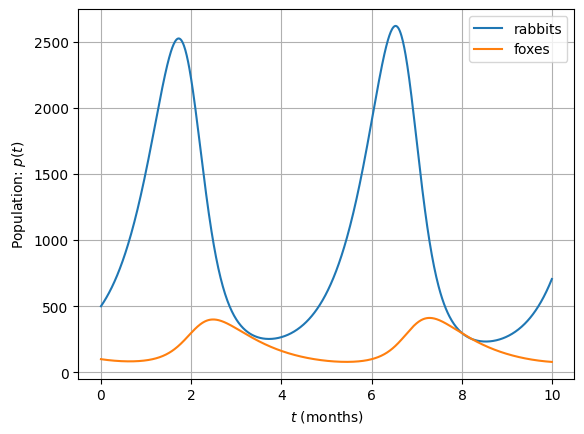

In [ ]:
plt.figure("myjungle")
plt.plot(t[0:1000], v[0:1000], label = ("rabbits", "foxes"))
plt.grid(True)
plt.xlabel("$t$ (months)")
plt.ylabel("Population: $p(t)$")
plt.legend()

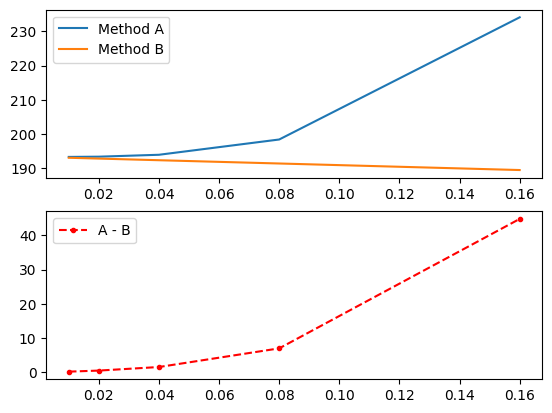

In [31]:
timesteps = [0.01, 0.02, 0.04, 0.08, 0.16]
methodA = [193.21, 193.28, 193.84, 198.32, 234.16]
methodB = [192.96, 192.72, 192.24, 191.28, 189.36]

A_B = []
for idx in range(5):
    A_B.append(methodA[idx] - methodB[idx])

#plt.figure("methods")
plt.subplots(2, 1)
plt.subplot(2, 1, 1)
plt.plot(timesteps, methodA, label = "Method A")
plt.plot(timesteps, methodB, label = "Method B")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(timesteps, A_B, ".--r", label = "A - B")
plt.legend()

$(e_ m)_{\rm max} = C \Delta t^ p \qquad {as} \qquad \Delta t\rightarrow 0.$

In [ ]:
dAdt = []
dBdt = []
for idx in range(4):
    da_dt = (methodA[idx + 1] - methodA[idx]) / (timesteps[idx + 1] - timesteps[idx])
    db_dt = (methodB[idx + 1] - methodB[idx]) / (timesteps[idx + 1] - timesteps[idx])
    dAdt.append(round(da_dt, 5))
    dBdt.append(round(db_dt, 5))

print(dAdt)
print(dBdt)

[7.0, 28.0, 112.0, 448.0]
[-24.0, -24.0, -24.0, -24.0]


For every increase of $\Delta t$ by a magnitude of 2, slope of method A increases by a magnitude of 4.\
For every increase of $\Delta t$ by a magnitude of 2, slope of method B stays the same.

Then, at $\Delta t$ = $0$, the accurate distance according to method $B$ should be,\
$192.96 + 24*0.01$ = $193.2$

Now let's calculate convergence rates for $A$ and $B$.

In [33]:
errorA = []
errorB = []
u = 193.2
for idx in range(5):
    errorA.append(round((methodA[idx] - u), 5))
    errorB.append(round((methodB[idx] - u), 5))
print(errorA)
print(errorB)

[0.01, 0.08, 0.64, 5.12, 40.96]
[-0.24, -0.48, -0.96, -1.92, -3.84]


When $\Delta t$ increases to a magnitude of 2, error of method A increases to a magnitude of $2^3$.\
When $\Delta t$ increases to a magnitude of 2, error of method B increases to a magnitude of $2$.\
convergence rate of method $A$: $p = 3$\
convergence rate of method $B$: $p = 1$

In [ ]:
def step_RK2_ME(evalf, dt, vn, tn):
    """
    Takes a single timestep of the Modified Euler version of a 2nd order
    Runge-Kutta method (RK2_ME) to integrate the state from vn (at time tn)
    to vn1 (at time tn1 = tn + dt).

    Args:
        evalf (function reference): the referenced function has inputs of
            a state vector (v) and time (t) and returns the forcing f(v, t).
            v and f are float lists.
        dt (float): time increment
        vn (float list): current state
        tn (float): current time

    Returns:
        float list: next state, i.e. vn1
    """
    # compute RHS for the a vector
    ta = tn
    va = vn
    fa = evalf(va, ta)
    # compute the a vector
    a = []
    for i in range(len(vn)):
        a.append(dt*fa[i])

    # compute RHS for the b vector
    tb = tn + 0.5*dt
    vb = []
    for i in range(len(vn)):
        vb.append(vn[i] + 0.5*a[i])
    fb = evalf(vb, tb)
    # compute the b vector
    b = []
    for i in range(len(vn)):
        b.append(dt*fb[i])

    # compute the next step
    vn1 = []
    for i in range(len(vn)):
        vn1.append(vn[i] + b[i])
    return vn1


def step_RK2_HEUN(evalf, dt, vn, tn):
    """
    Takes a single timestep of the Heun version of a 2nd order
    Runge-Kutta method (RK2_ME) to integrate the state from vn (at time tn)
    to vn1 (at time tn1 = tn + dt).

    Args:
        evalf (function reference): the referenced function has inputs of
            a state vector (v) and time (t) and returns the forcing f(v, t).
            v and f are float lists.
        dt (float): time increment
        vn (float list): current state
        tn (float): current time

    Returns:
        float list: next state, i.e. vn1
    """
    #### BEGIN SOLUTION ####
    raise NotImplementedError("Implement the Heun RK2 step method")
    #### END SOLUTION ####
